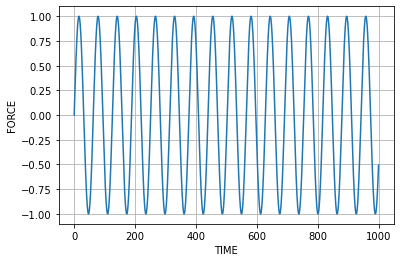

In [19]:
import numpy as np
from scipy.integrate import odeint
import math
import matplotlib.pyplot as plt 

from spring_damp import spring_damp_mass

force_sin = np.sin
sdm_sin = spring_damp_mass(state_vec=[0,0], time_in_sec=1000, mass=10, K=2,B=5, amplitude = 1 ,omega = 0.1, force=force_sin)
sdm_sin.force_graph()

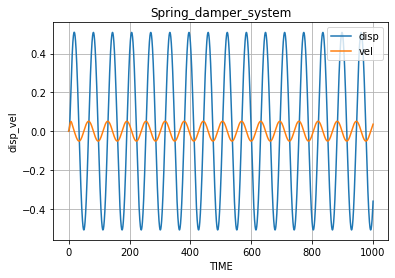

In [20]:
sdm_sin.disp_vel_graph()

In [40]:
from sympy import *

t = Symbol('t')
w = 0.1 
f = sin(w * t)

f_prime = f.diff(t)

f = lambdify(t, f)
f_prime = lambdify(t, f_prime)



In [41]:
f(30)

0.1411200080598672

In [44]:
f_prime(30)

-0.09899924966004454